Universidad Del Valle de Guatemala

Departamento de Ciencias de la Computación

Inteligencia Artigicial

Laboratorio 3

Diana Lucía Fernández Villatoro - 21747

Jennifer Michelle Toxcón Ordoñes - 21276

Emilio José Solano Orozco - 21212

Repositorio Git: https://github.com/Wachuuu15/IA_LABS.git

# TASK 1 - Preguntas Teóricas

**1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque**
- _Descenso de gradiente:_ Es un algoritmo de optimización el cual calcula la gradiente en función de pérdida con respecto a parámetros del modelo utilizando todo el conjunto de datos de entrenamiento. Posteriormente se actualizan los parámetros en dirección opuesta al gradiente para que se pueda minimizar la pérdida.

    _Ventajas:_
    - Se aprovecha la eficiencia de las operaciones vectorizadas en hardware moderno
    - Puede converger a la solución global en problemas convexos

    _Desventajas:_
    - Requiere que el conjunto de datos esté presente en memoria, teniendo una impracticidad con conjuntos de datos grandes.
    - La actualización de parámetros ocurre luego de procesar todo el conjunto de datos, teniendo un costo computacional alto.

- _Descenso de gradiente por mini batches:_ Esta variante del descenso de gradiente divide el conjunto de datos de entrenamiento en batches mucho más pequeños para calcular la gradiente de cada lote, actualizando los parámetros del modelo luego de cada mini batch.

    _Ventajas:_
    - Aprovecha la eficiencia de operaciones vectorizadas.
    - Maneja conjuntos de datos más grandes.
    - Utiliza la paralelización y se beneficia de ella y de la aceleración de hardware moderno.

    _Desventajas:_
    - Puede no converger tan rápidamente
    - Requiere ajuste de hiperparámetros como el tamaño del mini lote 

- _Descenso de gradiente estocástico:_ Esta versión resulta mucho más eficiente que el algoritmo de descenso de gradiente por mini batches pues, en lugar de utilizar lotes predefinidos, este selecciona un ejemplo de entrenamiento de modo aleatorio en cada iteración, con el cual se le calcula el gradiente y se actualizan los parámetros del modelo.

    _Ventajas:_
    - Puede converger rápidamente en problemas no convexos y no estacionarios
    - Utiliza una menor carga computacional por iteración

    _Desventajas:_
    - Tiene una mayor viabilidad en las actualizaciones de parámetros debido a la aleatoriedad de la selección de batches
    - No aprovecha completamente la eficiencia de las operaciones vectorizadas

**2. Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada**

Definiendo la extracción de features como la transformación de los datos originales en un nuevo conjunto de características, generalmente más pequeño y más significativo, y la selección de features como elegir un subconjunto de las características originales para luego eliminar aquellas que se consideran mejor importantes o redundantes. Ambas técnicas buscan mejorar el rendimiento de modelos y la eficiencia computación de ellos, mediante la reducción de la dimensionalidad. 

Sin embargo, la extracción de features crea nuevas representaciones, mientras que la selección únicamente elige subconjuntos de los datos originales. Por último, vale la pena resaltar que la extracción puede ser más adecuada para capturar información más compleja y abstracta, mientras que la selección se prefiere cuando la interpretación de las características es crucial o se desea mantener la integridad de las características originales.

**3. Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros**

Este tipo de red neuronal consta únicamente por una capa de entrada y una de salida, el cual es comúnmente utilizado para problemas de clasificación binaria linealmente separables. Su arquitectura está dividida en la capa de entrada y la de salida, donde la capa de entrada consta de nodos que representan características de la entrada del problema y cada nodo está conectado a los demás mediante un peso asociado. Por su parte, la capa de salida consiste en un único nodo que es producido por la salida de la red.

Por otro lado, el funcionamiento de esta red está dividido en la inicialización, donde se asignan pesos aleatorios o predefinidos a las conexiones de los nodos, la propagación hacia adelante, la cual calcula la salida el perceptrón mediante la suma del producto de cada entrada con su respectivo peso, el cálculo de error, donde se compara la salida obtenida con la deseada, la actualización de pesos, donde estos se actualizan de acuerdo con la regla de aprendizaje del perceptrón para reducir el error, y la iteración, que es donde los pasos anteriores se repiten para cada muestra de entrenamiento hasta que el error se considera aceptable o hasta que se alcance el número de iteraciones predefinido.

## TASK 2 - Ejercicios prácticos

### Task 2.1 - Gradiente Descendiente Estocástico

Descenso de gradiente

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
def gradientDescent(X, Y, theta, alpha, numIterations):
    Xtrans = X.transpose()
    numPoints = len(Y)
    
    start_time = time.time()  # Guardar tiempo de inicio
    for i in range(0, numIterations):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - Y

        cst = np.sum(loss ** 2) / (2 * numPoints)
        print("Iteration %d | Cost: %f" % (i, cst))
        
        gradient = np.dot(Xtrans, loss) / numPoints
        theta = theta - alpha * gradient

        alpha = alpha / (1 + i)

        print("Theta en la iteración %d:" % i, theta)
        print("Gradiente en la iteración %d:" % i, gradient)
        
    end_time = time.time()  # Guardar tiempo de fin
    
    print("Parámetros finales del modelo:", theta)
    execution_time = end_time - start_time  # Calcular tiempo de ejecución
    print("Tiempo de ejecución:", execution_time, "segundos")
    
    return theta

def genData(numPoints, bias, variance):
    X = np.zeros(shape=(numPoints, 2))
    Y = np.zeros(shape=numPoints)
    for i in range(0, numPoints):
        X[i][0] = 1  # Bias term
        X[i][1] = i
        Y[i] = 2 * i**3 - 3 * i**2 + 5 * i + 3 + np.random.uniform(0, variance)
    return X, Y

numPoints = 90
X, Y = genData(numPoints, 20, 9)

a, b = np.shape(X)

numIterations = 1000
alpha = 0.001 

theta = np.ones(2)

theta = gradientDescent(X, Y, theta, alpha, numIterations)

x_real = np.linspace(0, numPoints, 100)
y_real = 2 * x_real**3 - 3 * x_real**2 + 5 * x_real + 3

x_approximated = np.linspace(0, numPoints, 100)
y_approximated = np.dot(np.column_stack((np.ones(100), x_approximated)), theta)


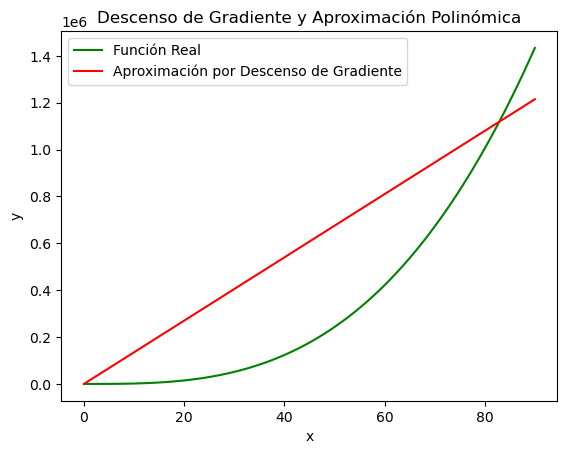

In [124]:
plt.plot(x_real, y_real, label='Función Real', color='green')
plt.scatter(X[:, 1], Y, color='blue', label='Puntos de Muestra Real')
plt.plot(x_approximated, y_approximated, color='red', label='Aproximación por Descenso de Gradiente')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Descenso de Gradiente y Aproximación Polinómica')
plt.show()

A través del descenso de gradiente, hemos mejorado la aproximación de nuestro modelo polinómico de tercer grado a los datos reales. Aunque el costo final es elevado, la visualización revela una mejor alineación entre la curva real y la aproximación del modelo. Experimentaremos con más ajustes de hiperparámetros para mejorar aún más la convergencia y el ajuste del modelo. 

Descenso de gradiente estocástico

In [196]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
def polynomial_function(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

def derivative_polynomial_function(x):
    return np.polyval(np.polyder([2, -3, 5, 3]), x)

def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2) / 2

def stochastic_gradient_descent(initial_x, learning_rate, num_iterations):
    x_values = [initial_x]
    costs = []

    start_time = time.time()  # Guardar tiempo de inicio
    for i in range(num_iterations):
        current_x = x_values[-1]
        gradient = derivative_polynomial_function(current_x)
        new_x = current_x - learning_rate * gradient
        x_values.append(new_x)

        y_pred = polynomial_function(new_x)
        cost = cost_function(polynomial_function(current_x), y_pred)
        costs.append(cost)
        
        print("Iteración {}: Costo {}".format(i + 1, cost))

    end_time = time.time()
    execution_time = end_time - start_time  
    print("Tiempo de ejecución:", execution_time, "segundos")

    return np.array(x_values), np.array(costs)

initial_guess = 0.0
learning_rate = 0.0001
num_iterations = 500

x_values, costs = stochastic_gradient_descent(initial_guess, learning_rate, num_iterations)
y_values_approximated = polynomial_function(x_values)

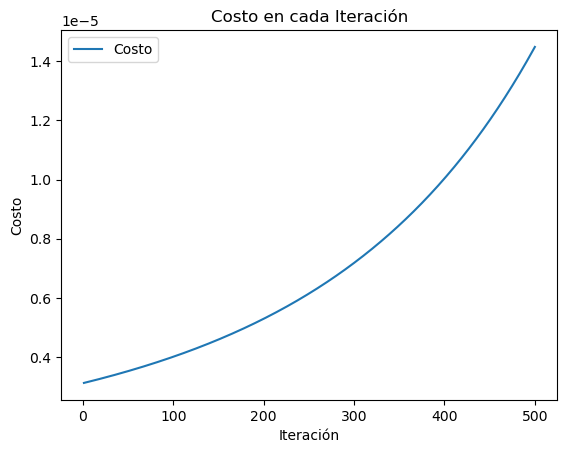

In [214]:
plt.plot(range(1, num_iterations + 1), costs, label='Costo')
plt.xlabel('Iteración')
plt.ylabel('Costo')
plt.legend()
plt.title('Costo en cada Iteración')
plt.show()

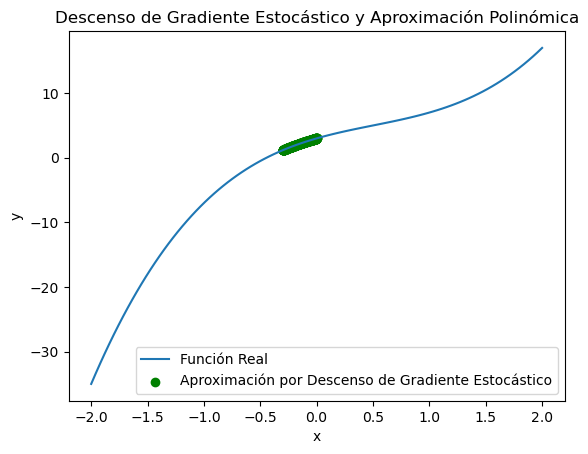

In [215]:
plt.plot(x_real, y_real, label='Función Real')
plt.scatter(x_values, y_values_approximated, color='green', label='Aproximación por Descenso de Gradiente Estocástico')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Descenso de Gradiente Estocástico y Aproximación Polinómica')
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
def polynomial_function(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

def derivative_polynomial_function(x):
    return np.polyval(np.polyder([2, -3, 5, 3]), x)
                      
def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2) / 2


def mini_batch_gradient_descent(X, Y, theta, alpha, num_epochs, batch_size):
    m = len(Y)
    costs = []
    start_time = time.time()  
    for epoch in range(num_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]
        
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            Y_batch = Y_shuffled[i:i+batch_size]
            gradient = np.dot(X_batch.T, np.dot(X_batch, theta) - Y_batch) / len(Y_batch)
            theta -= alpha * gradient
        
    
        Y_pred = np.dot(X, theta)
        cost = cost_function(Y, Y_pred)
        costs.append(cost)
        
        print("Epoch {}: Costo {}".format(epoch + 1, cost))
        
    end_time = time.time() 
    execution_time = end_time - start_time  
    print("Tiempo de ejecución:", execution_time, "segundos")
        
    return theta, costs


np.random.seed(42)
X_train = np.random.rand(100, 1) * 10
Y_train = polynomial_function(X_train) + np.random.randn(100, 1) * 5


X_train_b = np.c_[np.ones((100, 1)), X_train]


theta = np.random.randn(2, 1)


learning_rate = 0.001
num_epochs = 100
batch_size = 10

theta_final, costs = mini_batch_gradient_descent(X_train_b, Y_train, theta, learning_rate, num_epochs, batch_size)

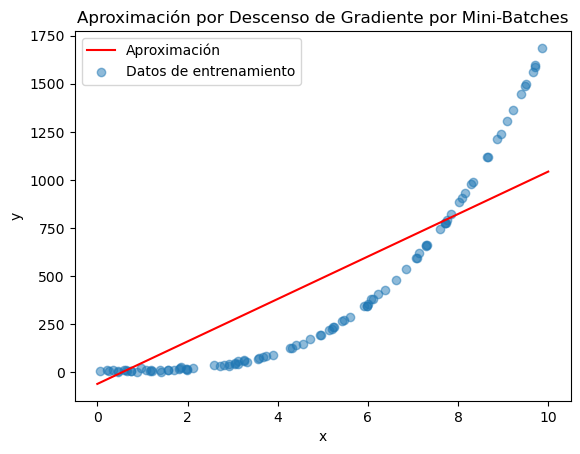

In [7]:
X_new = np.linspace(0, 10, 100).reshape(-1, 1)
X_new_b = np.c_[np.ones((100, 1)), X_new]
Y_new = X_new_b.dot(theta_final)

plt.plot(X_new, Y_new, "r-", label="Aproximación")
plt.scatter(X_train, Y_train, alpha=0.5, label="Datos de entrenamiento")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Aproximación por Descenso de Gradiente por Mini-Batches")
plt.show()

El SGD actualiza los parámetros utilizando un solo ejemplo de datos a la vez, lo que puede llevar a actualizaciones más frecuentes y, por lo tanto, a una convergencia más rápida, especialmente en conjuntos de datos grandes, por lo cual se entiende porque fue el más rápido de los tres

Referencias: https://pythonguia.com/scikit-aprender-descenso-de-gradiente/

### Task 2.3 - Perceptrón

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def fit(x, y, iteration, learningRate):
  samples, features= x.shape
  weight= np.zeros(x.shape[1] + 1)
  errors_= []

  for _ in range(iteration):
    error= 0

    for xi, target in zip(x, y):
      update = learningRate * (target - predict(xi, weight))

      weight[1:] += update * xi
      weight[0] += update

      error += int(update != 0.0)

  errors_.append(error)

  return weight, errors_

def predict(x, weight):
  return np.where(netInput(x, weight) >= 0.0, 1, -1)
   
def netInput(x, weight):
  netInput= np.dot(x, weight[1:]) + weight[0]
  return netInput

#Data set de Iris
iris= load_iris()
x = iris.data[:, [0, 1]]
y= np.where(iris.target == 0, -1, 1)

#Datos para le dataset
testSize= 0.2
randomState= 45

#Dividir el dataset en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

#Entrenar el perceptrón
weigths, _= fit(x_train, y_train, 1000, 0.1)

#Frontera de decisión
plt.scatter(x_train[y_train == 1, 0], x_train[y_train ==1, 1], color= 'violet', marker= '*', label='setosa')
plt.scatter(x_train[y_train == -1, 0], x_train[y_train== -1, 1], color= 'green', marker= 'o', label='No setosa')

#Minimos y máximos
xMin, xMax = x_train[:, 0].min() -1, x_train[:, 0].max() + 1
yMin, yMax = x_train[:, 1].min() -1, x_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(xMin, xMax, 0.02), np.arange(yMin, yMax, 0.02))
z= predict(np.c_[xx.ravel(), yy.ravel()], weigths)
z= z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.3, cmap='coolwarm')

#Gráfica
plt.xlabel('Septal Length')
plt.ylabel('Septal width')
plt.legend(loc= 'upper right')
plt.title('Gráfica del perceptron con el set de datos Iris')
plt.show()

In [ ]:
#Métrica de rendimiento
yPred= predict(x_test, weigths)
acurracy= np.mean(yPred == y_test)

print(acurracy)

#Datos para la gráfica
labels= ["Acurracy", "Incorrect"]
colors=['#78bb72', '#4c7249']

#Gráfica de pastel
plt.pie([acurracy, 1- acurracy], labels= labels, autopct= "%1.1f%%", colors= colors)
plt.title('Métrica de rendimiento para el perceptrón')
plt.legend(loc="upper right")
plt.show()

**¿Por qué eligió esta métrica?**

El utilizar una gráfica de pie es una forma sencilla y gráfica de mostrar el rendimiento de un modelo. En este caso en la gráfica se está mostrando el porcentaje de cuántos valores fueron predecidos de manera correcta e incorrecta, lo que nos permite realizar la comparación de estas proporciones y, al ver que el área verde claro, la cual representa los aciertos, se puede decir que el modelo está funcionando de manera correcta, al tener un aproximado de 93.3% de predicciones correctas